# Probability Distributions

**probability distribution**: a mathematical function we use to representat a real-world process where the outcome is a **random variable**: a variable who's value in unknown

Most distributions have **parameters** that define their shape.

- uniform (randint): all outcomes are equally likely
    - parameters: low + high cutoffs
- binomial: number of sucesses after n trials
    - assumes independence of trials
    - n: number of trials
    - p: probability of sucess
    - definition of "success" is arbitrary
- normal: the "bell curve"; values closer to the middle are more likely that values further away
    - mean, $\mu$: center point of the distribution
    - standard deviation, $\sigma$: the spread of the distribution, how wide or narrow it is
- poisson: number of events that occur for a given time interval
    - k, $\lambda$: average rate over the time interval
    - upper bound is infinite

What we can get out of a scipy distribution object:

- value -> probability
    - **pmf**: equal to a point (only for discrete distributions!)
    - **cdf**: less than or equal to a point
    - **sf**: greater than a point
- probability -> value
    - **ppf**: less than or equal to a point
    - **isf**: greater than a point
- **rvs** for random values (could also use numpy)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
plt.rc('figure', figsize=(13, 6))
plt.rc('font', size=14)

The `stats` module within [scipy](https://www.scipy.org/) gives a lot of functions and objects for statistical computation, including the functionality we'll need for working with probability distributions.

In [2]:
from scipy import stats

## Working with Probability Distributions

`rvs` can be used to visualize a distribution

In [32]:
pd.Series(stats.randint(1, 7).rvs(100)).value_counts().sort_index()

1    14
2    20
3    22
4    14
5    14
6    16
dtype: int64

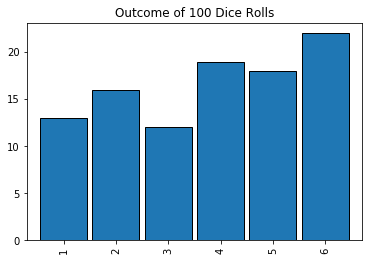

In [39]:
x = stats.randint(1, 7).rvs(100)
pd.Series(x).value_counts().sort_index().plot.bar(
    width=.9,
    ec='black',
    title='Outcome of 100 Dice Rolls',
)

Demo: using distribution methods

- What is the probability we roll a 3?

In [40]:
# pmf: value -> probability
stats.randint(1, 7).pmf(3)

0.16666666666666666

Text(0.5, 1.0, 'What does the pmf of the uniform distribution look like?')

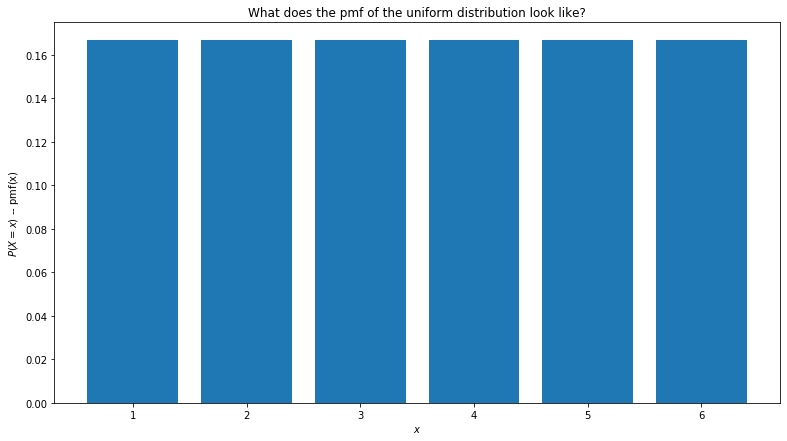

In [50]:
# plot each outcome vs the likelihood of that outcome
x = [1, 2, 3, 4, 5, 6]
y = stats.randint(1, 7).pmf(x)

plt.figure(figsize=(13, 7))
plt.bar(x, y)
plt.ylabel('$P(X = x)$ -- pmf(x)')
plt.xlabel('$x$')
plt.title('What does the pmf of the uniform distribution look like?')

- What is the probability we roll a 3 or less?

In [44]:
# cdf: value -> probability
stats.randint(1, 7).cdf([3, 4, 5])

array([0.5       , 0.66666667, 0.83333333])

Text(0.5, 1.0, 'What does the pmf of the uniform distribution look like?')

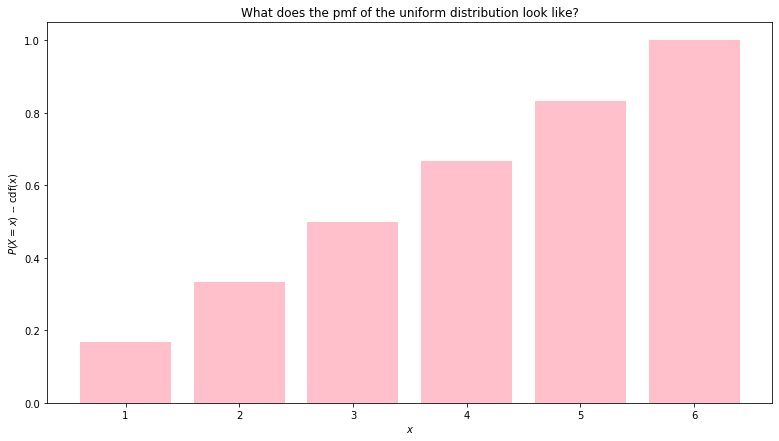

In [52]:
# plot each outcome vs the likelihood of that outcome
x = [1, 2, 3, 4, 5, 6]
y = stats.randint(1, 7).cdf(x)

plt.figure(figsize=(13, 7))
plt.bar(x, y, fc='pink')
plt.ylabel('$P(X = x)$ -- cdf(x)')
plt.xlabel('$x$')
plt.title('What does the pmf of the uniform distribution look like?')

- What is the probability we roll greater than a 3?

In [43]:
# sf: value -> probability
stats.randint(1, 7).sf(3)

0.5

- There's a 50% chance we roll less than or equal to what number?

In [53]:
# ppf: probability -> value
stats.randint(1, 7).ppf(.5)

3.0

- There's a 50% chance we roll greater than what number?

In [54]:
# isf: probability -> value
stats.randint(1, 7).isf(.5)

3.0

## Examples

Suppose the average high temperature in august is 98.2 ± 2.7 degrees farenheiht. How hot would it have to be for a day to be in the hottest 10% of all days? The lowest 25%? How likely is it that the temperature breaks 100 degrees?

In [55]:
mean = 98.2 # loc
sd = 2.7 # scale

stats.norm(mean, sd).isf(.1)

101.66018922697043

In [70]:
random_temps = np.random.normal(98.2, 2.7, 10000)
pd.Series(random_temps).quantile(.9)

101.66729463088338

In [71]:
stats.norm(mean, sd).ppf(.25)

96.37887767447059

In [72]:
pd.Series(random_temps).quantile(.25)

96.33820159187843

In [73]:
stats.norm(mean, sd).sf(100)

0.25249253754692325

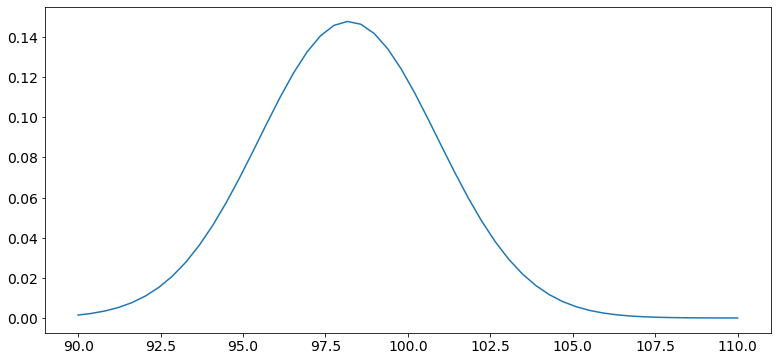

In [76]:
x = np.linspace(90, 110)
y = stats.norm(mean, sd).pdf(x)

plt.plot(x, y)

We know that the average number of messages in the zoom chat during a lecture is 25. During the probability distributions lecture, we observe that 29 chat messages were sent. How likely is it that we observed 29 chat messages? 29 or fewer? How likely is it we observed 29 or more chat messages?

In [77]:
average_rate = 25

stats.poisson(25).pmf(29)

0.054495342156142663

In [78]:
stats.poisson(25).cdf(29)

0.8178960840225449

In [79]:
stats.poisson(25).sf(28)

0.23659925813359786

Text(0, 0.5, '$P(X = x)$')

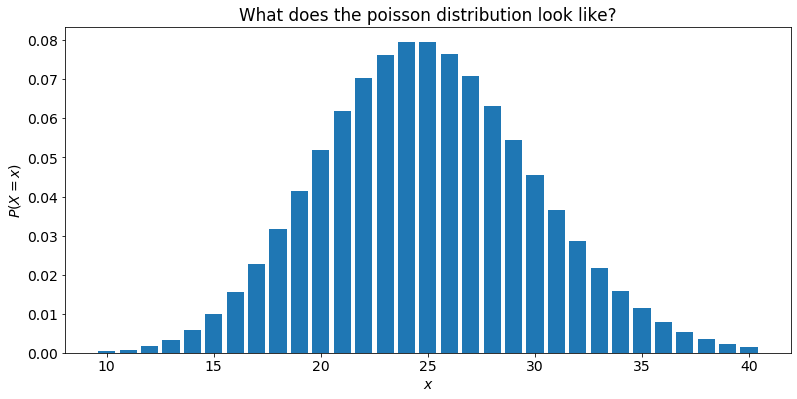

In [82]:
x = np.arange(10, 41)
y = stats.poisson(25).pmf(x)

plt.bar(x, y)
plt.title('What does the poisson distribution look like?')
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')

Suppose our company's weekly newsletter has been sent out, in its entire lifetime, 10,412 times. Of the times it has been sent out, it has been opened 2,598 times. This week we sent out 688 emails and found that 160 of them were opened. How likely is it that this many emails or fewer were opened?

In [ ]:
# P(160 or < 160 / 688 emails were opened)?
# one trial: we want to know if an email is opened or not opened
# P(success for one trial) = ?
# number of trials = ?
# outcome, X is 

In [83]:
overall_message_open_rate = 2598 / 10412
overall_message_open_rate

0.2495197848636189

In [85]:
p_sucess = overall_message_open_rate
n_trials = 688

In [86]:
stats.binom(n_trials, p_sucess).cdf(160)

0.16258305249428762

In [90]:
688 * overall_message_open_rate

171.6696119861698

<BarContainer object of 100 artists>

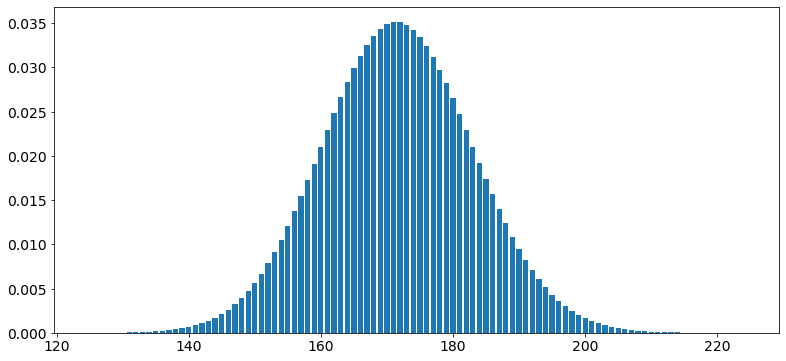

In [89]:
x = np.arange(125, 225)
y = stats.binom(n_trials, p_sucess).pmf(x)

plt.bar(x, y)